Visualize headlines dataset, clean dataset and split data

In [1]:
import pandas as pd

df = pd.read_json('./Sarcasm_Headlines_Dataset.json', lines=True)
#df.to_csv('./headlines.csv', index=False)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [3]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [5]:
df.duplicated().sum()

2

In [6]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


array([[<Axes: title={'center': 'is_sarcastic'}>]], dtype=object)

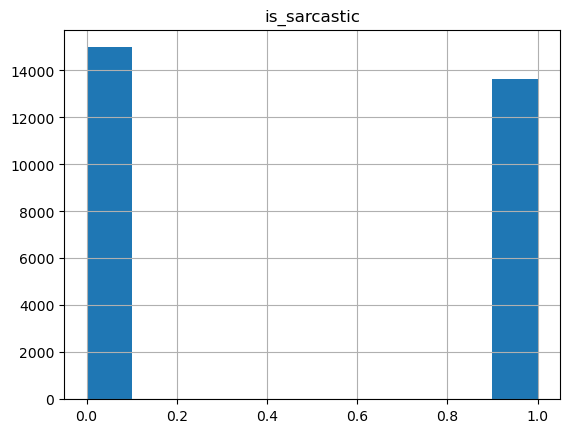

In [7]:
df.hist()

<Axes: ylabel='is_sarcastic'>

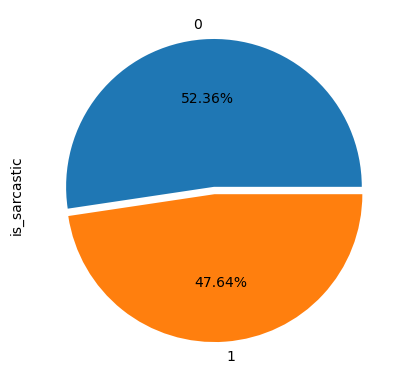

In [8]:
df['is_sarcastic'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0.05, 0])

# 1 : sarcastic
# 0 : not sarcastic

In [9]:
df = df.drop(['article_link'], axis=1)
df.drop_duplicates(subset=['headline'], inplace = True)

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from unidecode import unidecode
import collections
import re
import os
import warnings
warnings.filterwarnings('ignore')

In [11]:
origin = df['headline']
df['headline'] = df['headline'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))
df['headline'] = df['headline'].apply(lambda x: re.sub('\s+', ' ', x).strip())

In [12]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/erdem/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/erdem/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

df['headline'] = df['headline'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x.lower()) if word not in stop_words]))
df['headline']

0        thirtysometh scientist unveil doomsday clock h...
1        dem rep total nail congress fall short gender ...
2                            eat veggi delici differ recip
3                  inclement weather prevent liar get work
4         mother come pretti close use word stream correct
                               ...                        
28614                      jew celebr rosh hashasha someth
28615    intern affair investig disappoint conspiraci d...
28616          beauti accept speech week came queer korean
28617       mar probe destroy orbit spielbergg space palac
28618                                dad clarifi food stop
Name: headline, Length: 28503, dtype: object

In [14]:
import matplotlib.pyplot as plt

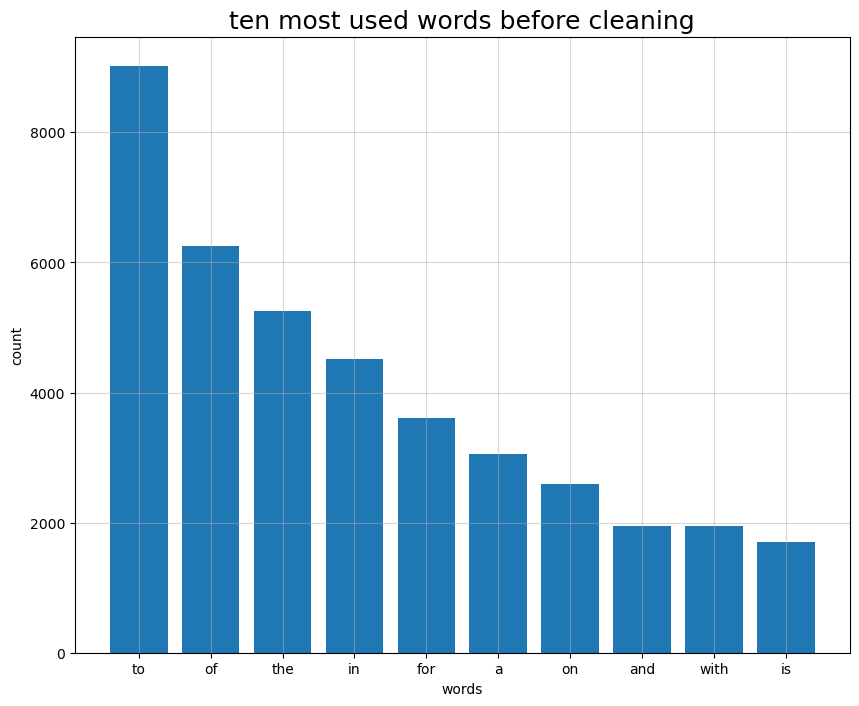

In [15]:
words = []
for text in origin:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.figure(figsize = (10, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('ten most used words before cleaning', fontsize = 18)
plt.xlabel('words')
plt.ylabel('count')
plt.show()

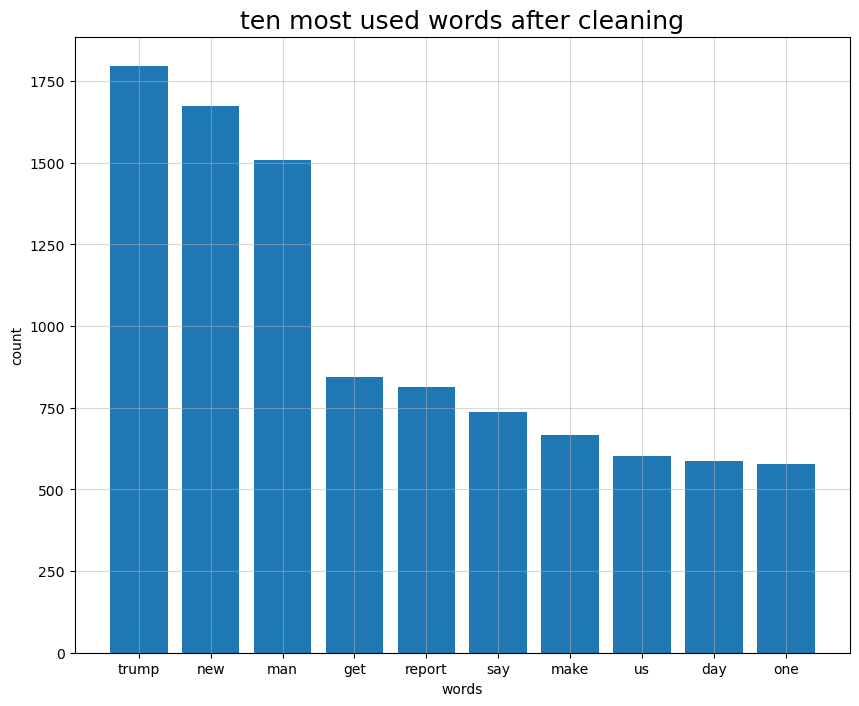

In [16]:
words = []
for text in df['headline']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.figure(figsize = (10, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('ten most used words after cleaning', fontsize = 18)
plt.xlabel('words')
plt.ylabel('count')
plt.show()

In [17]:
df.to_csv('./headlines.csv', index=False)

In [21]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'is_sarcastic', train_size=0.8, valid_size=0.1, test_size=0.1)

In [22]:
df_train = pd.DataFrame().assign(headline=X_train, is_sarcastic=y_train)
df_train.head()

,headline,is_sarcastic
18207,four homeless peopl dead girlfriend refer cudd...,1
7352,lamar odom document road recoveri new realiti ...,0
16678,third knockedov glass water make man want give,1
12242,jackson domin next year headlin,1
3172,famili hour layov set rough shantytown airport...,1


In [23]:
df_test = pd.DataFrame().assign(headline=X_test, is_sarcastic=y_test)
df_test.head()

,headline,is_sarcastic
12951,els besid joe biden might crash debat,0
4459,georg hw bush rememb vast contribut aid quilt ...,1
3251,white hous offici confirm malia obama seven fe...,1
14900,mta offici nervous tell commut wait train serv...,1
23598,occasion realiz someon thought dear friend act...,0


In [24]:
df_valid = pd.DataFrame().assign(headline=X_valid, is_sarcastic=y_valid)
df_valid.head()

,headline,is_sarcastic
2367,syria refuge communiti redraw map middl east,0
26361,man spend whole day dread fun activ sign,1
13854,unit flight divert dog load plane mistak,0
21880,chrysler name lebaron ceo,1
18700,expert prais upcom sonic movi accur depict hed...,1


In [25]:
df_train.to_csv('./headlines_train.csv', index=False)
df_test.to_csv('./headlines_test.csv', index=False)
df_valid.to_csv('./headlines_valid.csv', index=False)